In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import os
import matplotlib.pyplot as plt
import cv2

In [4]:
len(os.listdir('/kaggle/input/global-wheat-detection/train'))

3422

944c60a15.jpg


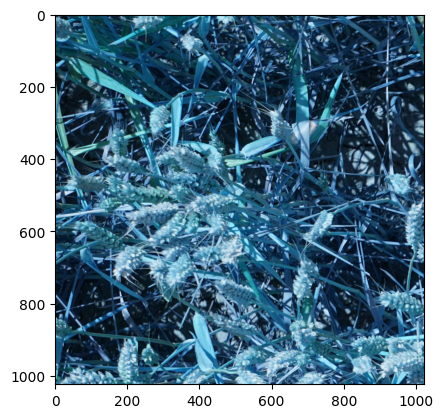

In [5]:
for file in os.listdir('/kaggle/input/global-wheat-detection/train'):
    image = os.path.join('/kaggle/input/global-wheat-detection/train',file)
    print(file)
    img = cv2.imread(image)
    plt.imshow(img)
    break
    

In [98]:
df = pd.read_csv('/kaggle/input/global-wheat-detection/train.csv')

In [7]:
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [8]:
df['image_id'].unique()

array(['b6ab77fd7', 'b53afdf5c', '7b72ea0fb', ..., 'a5c8d5f5c',
       'e6b5e296d', '5e0747034'], dtype=object)

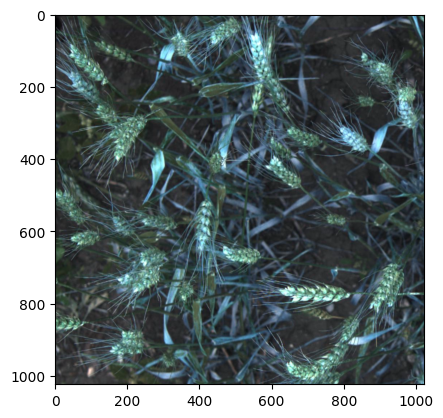

In [9]:
plt.imshow(cv2.imread('/kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg'))

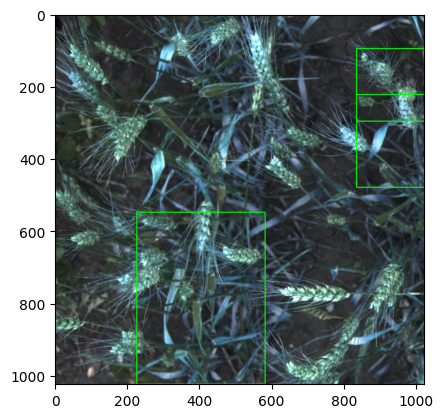

In [10]:
image = cv2.imread('/kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg')
x_min = 834.0
y_min = 222.0
x_max = (834.0+56.0)
y_max = (222.0+36.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)
x_min = 226.0
y_min = 548.0
x_max = (226.0+130.0)
y_max = (548.0+58.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)
x_min = 834.0
y_min = 95.0
x_max = (834.0+109.0)
y_max = (95.0+107.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)

plt.imshow(image)


Let's visualize one image with all the bboxes for that image

In [11]:
one_image_info = df[df['image_id']=='b53afdf5c']
one_image_info.head()

,image_id,width,height,bbox,source
47,b53afdf5c,1024,1024,"[988.0, 781.0, 36.0, 96.0]",usask_1
48,b53afdf5c,1024,1024,"[331.0, 863.0, 70.0, 95.0]",usask_1
49,b53afdf5c,1024,1024,"[47.0, 226.0, 65.0, 46.0]",usask_1
50,b53afdf5c,1024,1024,"[682.0, 974.0, 108.0, 50.0]",usask_1
51,b53afdf5c,1024,1024,"[63.0, 988.0, 156.0, 36.0]",usask_1


In [12]:
(one_image_info['bbox'].iloc[0][0])

'['

In [13]:
one_image_info['X_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]))
one_image_info['y_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]))
one_image_info['X_max'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[2])+float(x.strip('[]').split(',')[0]))
one_image_info['y_max'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[3])+float(x.strip('[]').split(',')[1]))
one_image_info['W'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[2]))
one_image_info['H'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[3]))

/tmp/ipykernel_24/2839306267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_image_info['X_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]))
/tmp/ipykernel_24/2839306267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_image_info['y_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]))
/tmp/ipykernel_24/2839306267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [14]:
one_image_info

,image_id,width,height,bbox,source,X_min,y_min,X_max,y_max,W,H
47,b53afdf5c,1024,1024,"[988.0, 781.0, 36.0, 96.0]",usask_1,988.0,781.0,1024.0,877.0,36.0,96.0
48,b53afdf5c,1024,1024,"[331.0, 863.0, 70.0, 95.0]",usask_1,331.0,863.0,401.0,958.0,70.0,95.0
49,b53afdf5c,1024,1024,"[47.0, 226.0, 65.0, 46.0]",usask_1,47.0,226.0,112.0,272.0,65.0,46.0
50,b53afdf5c,1024,1024,"[682.0, 974.0, 108.0, 50.0]",usask_1,682.0,974.0,790.0,1024.0,108.0,50.0
51,b53afdf5c,1024,1024,"[63.0, 988.0, 156.0, 36.0]",usask_1,63.0,988.0,219.0,1024.0,156.0,36.0
52,b53afdf5c,1024,1024,"[824.0, 901.0, 49.0, 77.0]",usask_1,824.0,901.0,873.0,978.0,49.0,77.0
53,b53afdf5c,1024,1024,"[815.0, 413.0, 90.0, 72.0]",usask_1,815.0,413.0,905.0,485.0,90.0,72.0
54,b53afdf5c,1024,1024,"[468.0, 161.0, 172.0, 66.0]",usask_1,468.0,161.0,640.0,227.0,172.0,66.0
55,b53afdf5c,1024,1024,"[888.0, 537.0, 76.0, 74.0]",usask_1,888.0,537.0,964.0,611.0,76.0,74.0
56,b53afdf5c,1024,1024,"[3.0, 88.0, 106.0, 69.0]",usask_1,3.0,88.0,109.0,157.0,106.0,69.0


In [15]:
bboxes = one_image_info[['X_min','y_min','X_max','y_max']].values

In [16]:
for bbox in bboxes:
    # print(bbox)
    x1,y1,x2,y2 = bbox
    # print(x1,y1,x2,y2)
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(0,255,0),2)

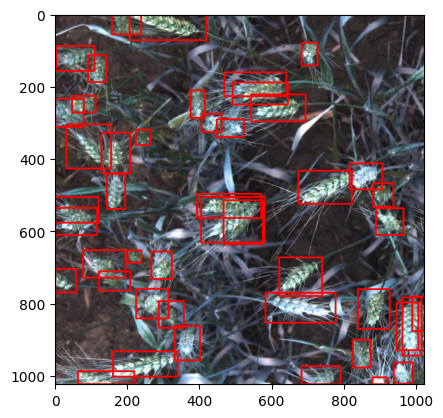

In [17]:
image = cv2.imread('/kaggle/input/global-wheat-detection/train/b53afdf5c.jpg')
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0),4)
    # break
plt.imshow(image)
    

In [18]:
import random

In [19]:
#Let's do this for a random picture

random.choice(df['image_id'].unique())

'88a2a7edd'

/tmp/ipykernel_24/500449650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_info['X_min'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]));
/tmp/ipykernel_24/500449650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_info['y_min'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]));
/tmp/ipykernel_24/500449650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

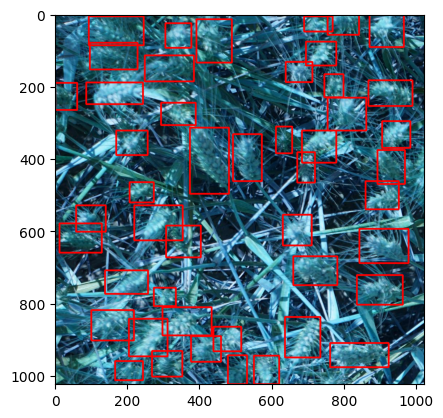

In [22]:
#function for creating the image with boxes
random_image_id = random.choice(df['image_id'].unique())
image_info = df[df['image_id']==random_image_id]
image_info['X_min'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]));
image_info['y_min'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]));
image_info['X_max'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[2])+float(x.strip('[]').split(',')[0]));
image_info['y_max'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[3])+float(x.strip('[]').split(',')[1]));
bboxes = image_info[['X_min','y_min','X_max','y_max']].values
image = cv2.imread(f'/kaggle/input/global-wheat-detection/train/{random_image_id}.jpg')
# image/=255
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0),4)
    # break
plt.imshow(image)
    


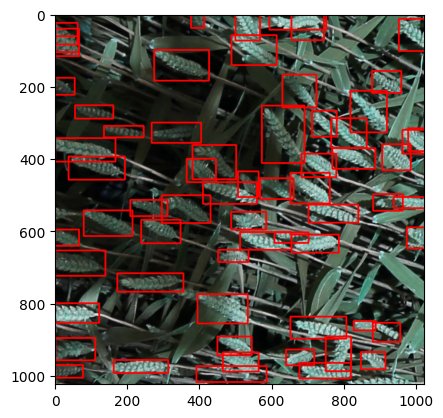

In [21]:
plt.imshow(image)

Visualizing the picture is done.

In [23]:
len(os.listdir('/kaggle/input/global-wheat-detection/test'))

10

Next steps:
1. Create a custom dataset
2. Create a NN model
3. Train and validate

In [106]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset

In [45]:
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [47]:
import ast

In [55]:
type(df['bbox'].iloc[10])

str

In [58]:
box = df['bbox'].apply(ast.literal_eval).iloc[10]

In [ ]:
# df = pd.read_csv('/kaggle/input/global-wheat-detection/train.csv')

In [99]:
#pre-process the df to make it easier to create bbox
def preprocess(df_any):
    #convert the bboxes str -> list
    df_any['bbox'] = df_any['bbox'].apply(ast.literal_eval)
    df_any[['x1','y1','width','height']] = pd.DataFrame(df_any['bbox'].tolist(),index = df.index)
    df_any['x2'] = df_any['x1']+df_any['width']
    df_any['y2'] = df_any['y1']+df_any['height']
    return df_any
    

In [100]:
processed_df = preprocess(df)

In [101]:
processed_df.head()

,image_id,width,height,bbox,source,x1,y1,x2,y2
0,b6ab77fd7,56.0,36.0,"[834.0, 222.0, 56.0, 36.0]",usask_1,834.0,222.0,890.0,258.0
1,b6ab77fd7,130.0,58.0,"[226.0, 548.0, 130.0, 58.0]",usask_1,226.0,548.0,356.0,606.0
2,b6ab77fd7,74.0,160.0,"[377.0, 504.0, 74.0, 160.0]",usask_1,377.0,504.0,451.0,664.0
3,b6ab77fd7,109.0,107.0,"[834.0, 95.0, 109.0, 107.0]",usask_1,834.0,95.0,943.0,202.0
4,b6ab77fd7,124.0,117.0,"[26.0, 144.0, 124.0, 117.0]",usask_1,26.0,144.0,150.0,261.0


In [104]:
b = processed_df[processed_df['image_id']=='b6ab77fd7'][['x1','y1','x2','y2']].values

In [109]:
df.shape[0]

147793

In [117]:
torch.ones(df.shape[0]) == torch.ones(df.shape[0],)

tensor([True, True, True,  ..., True, True, True])

In [118]:
b1 = torch.as_tensor(b,dtype = torch.float32)

In [135]:
-b1[:,1]+b1[:,3]

tensor([ 36.,  58., 160., 107., 117., 111.,  45.,  75.,  82., 103., 133.,  46.,
         83.,  91.,  93., 130.,  76.,  64.,  75.,  49.,  48.,  46.,  58.,  70.,
         64.,  72.,  70.,  91., 224., 138.,  75.,  83.,  41.,  71.,  60.,  74.,
         84., 158., 120.,  43., 136.,  38.,  31.,  81., 121.,  45.,  20.])

In [150]:
class WheatDataset(Dataset):
    def __init__(self,df,image_dir,transforms=None):
        self.df = df
        self.image_dir = image_dir
        self.transforms = transforms

    def __len__(self):
        return self.df['image_id'].nunique()

    def __getitem__(self,idx):
        image_id = self.df['image_id'].unique()[idx]

        #load image
        image_path = os.path.join(self.image_dir,f"{image_id}.jpg")
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


        #Getting bounding box co-ordinates for the image
        image_df = self.df[self.df['image_id']==image_id]
        boxes = image_df[['x1','y1','x2','y2']].values

        target = {
            'bbox':torch.as_tensor(boxes,dtype = torch.float32),
            'labels':torch.ones(image_df.shape[0],dtype = torch.int64),
            'image_id':torch.tensor([idx]),
            'area': torch.as_tensor((boxes[:,2]-boxes[:,0])*(boxes[:,3]-boxes[:,1]),dtype = torch.float32),
            'iscrowd':torch.zeros(image_df.shape[0],dtype = torch.int64) #as all are single objects
        }
        # image = transforms.to_tensor(image)
        return image,target
        
        

In [151]:
train_dir = '/kaggle/input/global-wheat-detection/train'

In [152]:
train_data = WheatDataset(processed_df,train_dir,transforms=None)

In [153]:
len(train_data)

3373

In [161]:
for x,y in train_data:
    print(y['bbox'])
    break

tensor([[ 834.,  222.,  890.,  258.],
        [ 226.,  548.,  356.,  606.],
        [ 377.,  504.,  451.,  664.],
        [ 834.,   95.,  943.,  202.],
        [  26.,  144.,  150.,  261.],
        [ 569.,  382.,  688.,  493.],
        [  52.,  602.,  134.,  647.],
        [ 627.,  302.,  749.,  377.],
        [ 412.,  367.,  480.,  449.],
        [ 953.,  220., 1009.,  323.],
        [  30.,   70.,  156.,  203.],
        [  35.,  541.,   81.,  587.],
        [ 103.,   60.,  220.,  143.],
        [ 417.,    4.,  527.,   95.],
        [ 764.,  299.,  883.,  392.],
        [ 539.,   58.,  597.,  188.],
        [ 139.,  274.,  260.,  350.],
        [ 461.,  634.,  579.,  698.],
        [ 215.,  634.,  328.,  709.],
        [ 134.,  903.,  261.,  952.],
        [ 737.,  545.,  824.,  593.],
        [ 292.,  930.,  335.,  976.],
        [   0.,  827.,   86.,  885.],
        [ 324.,   44.,  381.,  114.],
        [ 663.,  794.,  779.,  858.],
        [ 325.,  730.,  401.,  802.],
        [ 15